# Contexte

**Import de données**

- dossier /img avec une banque d'images de différentes couleurs
- dossier /Comp pour stocker les images compressées
- un fichier image.png à transformer

In [10]:
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, os.path
import time

**Variables générales**

In [11]:
file_list = [f for f in os.listdir("img") if not f.startswith('.')]
Number_img = len(file_list)
ext = ".png"
size =  32
img_size = 256
total_width = img_size*size
total_height = img_size*size

**Fonctions utiles**

In [12]:
#Entree un array de pixel et un pixel, retourne la position dans l'array du pixel le plus proche
def getnearpos(array,pixel): 
    dif = array-pixel*np.ones((len(array),1))
    idx = (np.sum(abs(dif),axis=1)).argmin()
    return idx   

# Script

**Création dossier compressé d'images**

Temps d execution : 0.8326938152313232 secondes ---


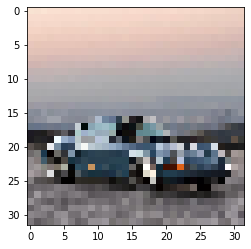

In [13]:
# Debut du decompte du temps
start_time = time.time()

database_pixel = np.zeros((Number_img-1,3))
database_img = np.zeros((Number_img-1,size,size,3)) #A supprimer si trop d'images

for i in range(1,Number_img) : 
    img = Image.open("img/" + str(file_list[i]))
    im = img.resize((size, size), Image.NEAREST) #Resize à la taille size
    im.save("Comp/" + str(i) + ext) #Sauvegarde
    img = mpimg.imread("Comp/" + str(i) + ext)
    
    pixel = im.resize((1, 1), Image.BICUBIC) #Creation de l'unique pixel associé à l'image
    pixel.save("Comp/pixel" + str(i) + ext)
    pixel = mpimg.imread("Comp/pixel" + str(i) + ext) #
    
    database_pixel[i-1] = pixel #Creation de la database de pixel associée à chaque image
    
    database_img[i-1] = img #Creation de la database d'img associée à chaque image #A supprimer si trop d'images

    
plt.imshow(im)
#print (database_pixel)

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

**Gestion de l'image test**

In [14]:
img = Image.open("image.png")
img = img.resize((img_size, img_size), Image.NEAREST)
img.save("image.square."+str(img_size)+".png")
img = mpimg.imread("image.square."+str(img_size)+".png")

Temps d execution : 17.927721977233887 secondes ---


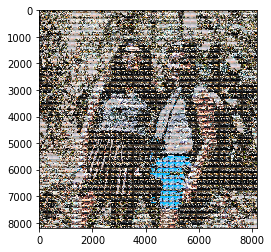

In [15]:
#Tableau d'association pixel de l'image à l'image de la banque d'image
# Debut du decompte du temps
start_time = time.time()

new = np.zeros((img_size,img_size))
for i in range(img_size):
    for j in range(img_size):
        new[i,j] = int(getnearpos(database_pixel,img[i,j]))

new_im = Image.new('RGB', (total_width, total_height))

x_offset = 0
i=0
for i in range(img_size):
    y_offset = 0
    for j in range(img_size):
        k = int(new[i,j]+1)
        img = "Comp/" + str(k) + ext
        new_im.paste(Image.open(img),(y_offset,x_offset))
        y_offset += size
    x_offset += size
    
plt.imshow(new_im)
new_im.save("Image.transform."+str(img_size)+"x"+str(size)+".png")

# Affichage du temps d execution
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

In [16]:
%whos

Variable         Type        Data/Info
--------------------------------------
Image            module      <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
Number_img       int         30
database_img     ndarray     29x32x32x3: 89088 elems, type `float64`, 712704 bytes (696.0 kb)
database_pixel   ndarray     29x3: 87 elems, type `float64`, 696 bytes
ext              str         .png
file_list        list        n=30
getnearpos       function    <function getnearpos at 0x109920b70>
i                int         255
im               Image       <PIL.Image.Image image mo<...>ize=32x32 at 0x11A4FD4A8>
img              str         Comp/1.png
img_size         int         256
j                int         255
k                int         1
mpimg            module      <module 'matplotlib.image<...>ges/matplotlib/image.py'>
new              ndarray     256x256: 65536 elems, type `float64`, 524288 bytes (512.0 kb)
new_im           Image       <PIL.Image.Image image mo<...>8192x8192 at 0x1